In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(5)

In [9]:
iris = datasets.load_iris()
X,Y = iris.data, iris.target

In [10]:
estimators = [
   ("k_means_iris_8",KMeans(n_clusters=8, n_init=1, random_state=140)),
   ("k_means_iris_3",KMeans(n_clusters=3, n_init=1, random_state=140)),
   ("k_means_iris_init",KMeans(n_clusters=3, n_init=1,init="random", random_state=140)),
]

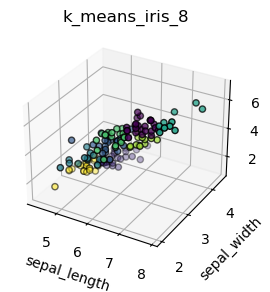

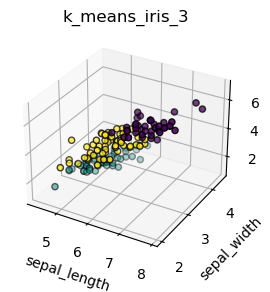

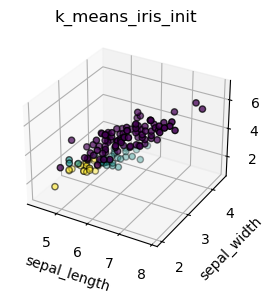

In [11]:

from mpl_toolkits.mplot3d import Axes3D
fignum = 1
for  name, est in estimators:
    est.fit(X)
    labels = est.labels_
    fig = plt.figure(fignum,figsize=(4,3))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0],X[:,1],X[:,2] , c=labels ,edgecolor = "k")
    fignum= fignum+1
    ax.set_xlabel("sepal_length")
    ax.set_ylabel("sepal_width")
    ax.set_title(name)
plt.show()

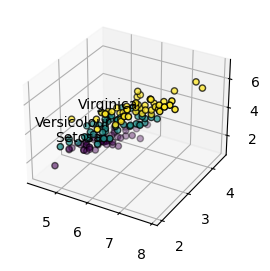

In [12]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111, projection='3d')
for name, label in [("Setosa",0), ("Versicolour",1) , ("Virginica",2)]:
    ax.text3D(
        X[Y == label ,  0 ].mean(),
        X[Y == label ,  1 ].mean(),
        X[Y == label ,  2 ].mean(),
        name,
        horizontalalignment = 'right'
    )
    
ax.scatter(X[:,0] , X[:,1], X[:,2],c=Y ,edgecolor = "k")    

In [13]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

In [14]:
china.shape

(427, 640, 3)

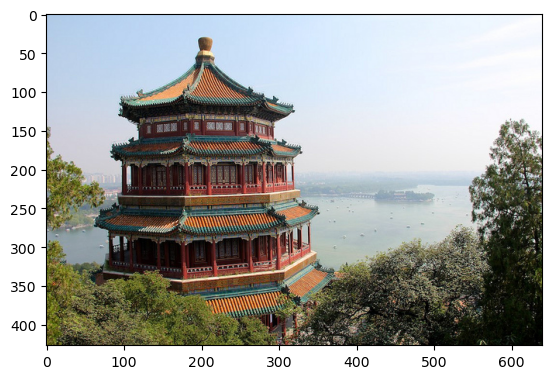

In [19]:
w , h , d  = china.shape
image_array = np.reshape(china,(w*h , d))

from sklearn.utils import shuffle
image_array_sample = shuffle(image_array , random_state =0)
kmeans = KMeans(n_clusters=2, n_init=1, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
plt.imshow(china)

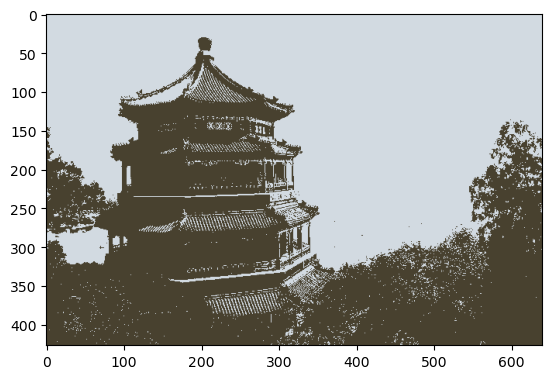

In [20]:
china_2 = kmeans.cluster_centers_[labels].reshape(w,h,d)/255
plt.imshow(china_2)

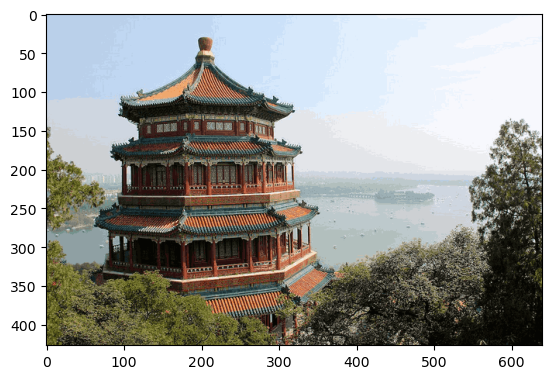

In [26]:
w , h , d  = china.shape
image_array = np.reshape(china,(w*h , d))

from sklearn.utils import shuffle
image_array_sample = shuffle(image_array , random_state =0)
kmeans = KMeans(n_clusters=64, n_init=1, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)
china_64 = kmeans.cluster_centers_[labels].reshape(w,h,d)/255
plt.imshow(china_64)

In [27]:
from sklearn import cluster , datasets
from sklearn.preprocessing import StandardScaler
np.random.seed(0)
n_samples =1500 

In [33]:
noisy_circles  = datasets.make_circles(n_samples = n_samples , factor = 0.5 , noise = 0.05)
noisy_moons = datasets.make_moons(n_samples = n_samples, noise = 0.05)
blobs = datasets.make_blobs(n_samples=n_samples , random_state=0)
no_structure = np.random.rand(n_samples,2),None

In [34]:
datasets = [
   (
    noisy_circles,{
       'eps':0.3,
       'n_neighbors':10,
       'n_cluster':2
    }
   ),
   (noisy_moons,{
       'eps':0.3,
       'n_neighbors':10,
       'n_cluster':2
    }),
   (blobs,{
       'eps':0.3,
       'n_neighbors':10,
       'n_cluster':3
    }),
   (no_structure,{
       'eps':0.3,
       'n_neighbors':10,
       'n_cluster':2
    }),

]

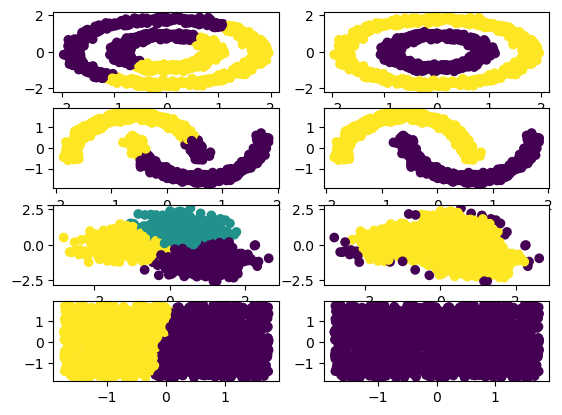

In [40]:
k=1
for  i,(dataset,params) in enumerate(datasets):
    X,Y = dataset
    X = StandardScaler().fit_transform(X)
    km = cluster.KMeans(n_clusters=params['n_cluster'])
    dbscan = cluster.DBSCAN(eps=params['eps'],min_samples=params['n_neighbors'])
    km.fit(X)
    dbscan.fit(X)
    Y_pred_km = km.predict(X)
    Y_pred_dbscan = dbscan.labels_.astype(int)
    plt.subplot(4,2,k)
    plt.scatter(X[:,0],X[:,1],c=Y_pred_km)
    k=k+1
    plt.subplot(4,2,k)
    plt.scatter(X[:,0],X[:,1],c=Y_pred_dbscan)
    k=k+1

